In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

In [2]:
# Step 2: Load dataset (Local system)
df = pd.read_csv(r"C:\Users\SAKSHI\Downloads\CL 1\Iris.csv")

print("First 20 rows of dataset:")
display(df.head(20))


First 20 rows of dataset:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
df=pd.read_csv("C:/Users/SAKSHI/Downloads/CL 1/Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
df.drop("Id",axis=1,inplace=True)

In [9]:
X=df.drop("Species", axis=1) #feature matrix with 4 columns
y=df["Species"] #target variable


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler=StandardScaler()  #lda sensitive to feature scales, standardisation centres the data
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [12]:
lda=LDA(n_components=2) #reduce 4d data to 2 discriminant axes
X_train_lda=lda.fit_transform(X_train_scaled,y_train) #learn how to best fit species
X_test_lda=lda.transform(X_test_scaled)

print("LDA Explained Variance Ratio:",lda.explained_variance_ratio_)


LDA Explained Variance Ratio: [0.99257284 0.00742716]


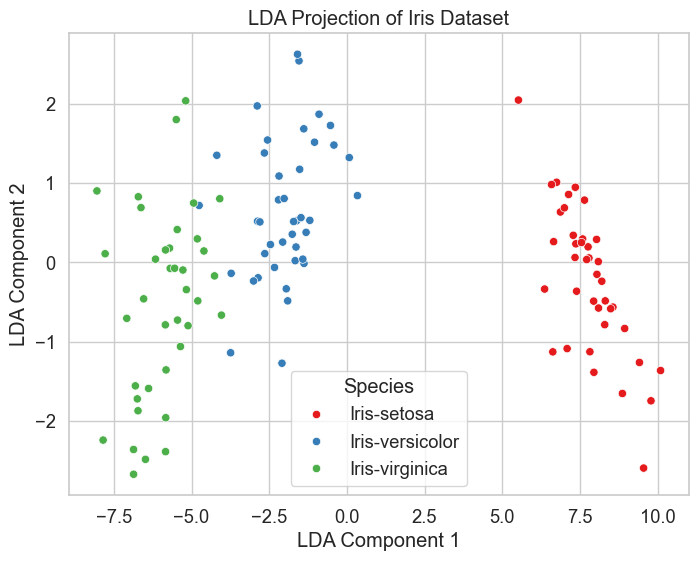

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_train_lda[:,0], y=X_train_lda[:,1], hue=y_train, palette="Set1")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA Projection of Iris Dataset")
plt.legend(title="Species")
plt.show()

In [14]:
y_pred=lda.predict(X_test_scaled) #prediction based on lda model

print("\nClassification Report:\n",classification_report(y_test,y_pred))
print("\nAccuracy Score:",accuracy_score(y_test,y_pred)) #excellent separation of classes


Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Accuracy Score: 1.0


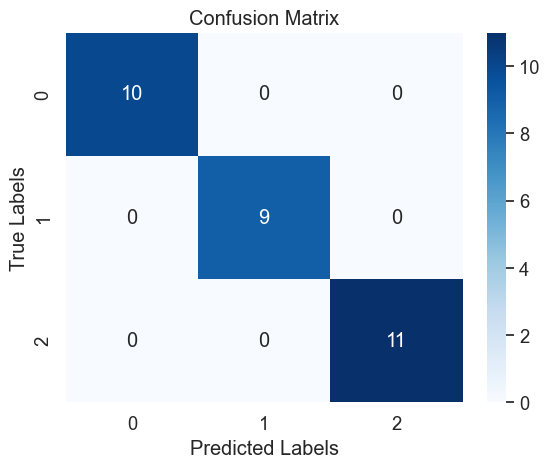

In [15]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()